#**Proyek Analisis Data: E-Commerce Public Dataset**
- Nama: Muhammad Rizki Alifianto
- Email:rizkialifianto23@gmail.com
- Id Dicoding:rizki_alif23

#**Menentukan Pertanyaan Bisnis**


1.   Bagaimana pengaruh musim terhadap jumlah penyewa sepeda
2.   Apakah workingday, weekday, dan holiday berpengaruh dalam jumlah penyewa sepeda
3. Kapan jam-jam ramai orang melakukan penyewaan sepeda
4. Bagaimana tren penyewa sepeda di setiap bulannya di tahun 2011 dan 2012
5. Bagaimana pengaruh cuaca dalam jumlah penyewa sepeda




#**Menyiapkan semua library yang dibutuhkan**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#**Data Wrangling**

##**Gathering Data**

In [ ]:
day_df = pd.read_csv('day.csv')
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##**Asessing Data**

**1. Mengecek tipe data day_df**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


pada kolom dteday terdapat kejanggalan yang mana tipe data object yang seharusnya datetime

**2. Mengecek tipe data day_df**

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


sama halnya dengan dataset day_df, pada hour_df terdapat satu kolom yaitu kolom dteday bertipe object yang seharusnya datetime

**3. Mengecek apakah ada duplikat data pada tabel day_df**

In [ ]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


pada tabel day_df tidak terdapat duplikasi data

**4. Mengecek apakah ada duplikat data pada tabel hour_df**

In [ ]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


begitu juga dengan hour_df tidak terdapat duplikasi data

**5. Mendescribe tabel day_df**

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**6. Mendescribe tabel hour_df**

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**7. Mengecek apakah ada missing values pada day_df**





In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Pada tabel day_df tidak terdapat missing values

**8. Mengecek apakah ada missing values pada hour_df**


In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##**Cleaning Data**

**1. Mengubah kolom dteday ke tipe data datetime**

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df.dteday)

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df.dteday)

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Masing-masing kolom dteday pada tabel day_df dan hour_df telah diubah tipe datanya menjadi datetime

**2. Menghapus beberapa kolom**

Ada beberapa kolom yang tidak dipakai karena tidak sesuai dengan pertanyaaan-pertanyaan yang ada diatas

*   Indeks
*   Windspeed
*   temp
*   atemp
*   hum











In [ ]:
drop_col = ['instant','windspeed','temp', 'atemp','hum']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


In [ ]:
drop_col = ['instant','windspeed','temp', 'atemp','hum']

for i in hour_df.columns:
  if i in drop_col:
    hour_df.drop(labels=i, axis=1, inplace=True)

hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


**3. Mengubah beberapa nama kolom**

In [ ]:
day_df.rename(columns={
    'dteday': 'ket_tanggal',
    'season' : 'musim',
    'holiday' : 'hari_libur',
    'weekday' : 'hari_biasa',
    'workingday' : 'hari_kerja',
    'weathersit' : 'cuaca',
    'yr': 'tahun',
    'mnth': 'bulan',
    'cnt': 'jumlah'
}, inplace=True)

day_df.head()

,ket_tanggal,musim,tahun,bulan,hari_libur,hari_biasa,hari_kerja,cuaca,casual,registered,jumlah
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


In [ ]:
hour_df.rename(columns={
    'dteday': 'ket_tanggal',
    'season' : 'musim',
    'holiday' : 'hari_libur',
    'weekday' : 'hari_biasa',
    'workingday' : 'hari_kerja',
    'weathersit' : 'cuaca',
    'yr': 'tahun',
    'mnth': 'bulan',
    'cnt': 'jumlah',
    'hr' : 'jam'
}, inplace=True)

hour_df.head()

,ket_tanggal,musim,tahun,bulan,jam,hari_libur,hari_biasa,hari_kerja,cuaca,casual,registered,jumlah
0,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


**4. Mengubah value pada beberapa kolom dengan keterangan yang informatif**

In [ ]:
day_df['bulan'] = day_df['bulan'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun',
    7: 'Jul', 8: 'Agu', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'
})
day_df['musim'] = day_df['musim'].map({
    1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'
})
day_df['hari_biasa'] = day_df['hari_biasa'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})
day_df['cuaca'] = day_df['cuaca'].map({
    1: 'Cerah/Sebagian Berawan',
    2: 'Berkabut/Berawan',
    3: 'Salju Tipis/Hujan',
    4: 'Cuaca Buruk'
})


In [ ]:
day_df['musim'] = day_df.musim.astype('category')
day_df['tahun'] = day_df.tahun.astype('category')
day_df['bulan'] = day_df.bulan.astype('category')
day_df['hari_libur'] = day_df.hari_libur.astype('category')
day_df['hari_biasa'] = day_df.hari_biasa.astype('category')
day_df['hari_kerja'] = day_df.hari_kerja.astype('category')
day_df['cuaca'] = day_df.cuaca.astype('category')

day_df.head()

,ket_tanggal,musim,tahun,bulan,hari_libur,hari_biasa,hari_kerja,cuaca,casual,registered,jumlah
0,2011-01-01,Semi,0,Jan,0,Sabtu,0,Berkabut/Berawan,331,654,985
1,2011-01-02,Semi,0,Jan,0,Minggu,0,Berkabut/Berawan,131,670,801
2,2011-01-03,Semi,0,Jan,0,Senin,1,Cerah/Sebagian Berawan,120,1229,1349
3,2011-01-04,Semi,0,Jan,0,Selasa,1,Cerah/Sebagian Berawan,108,1454,1562
4,2011-01-05,Semi,0,Jan,0,Rabu,1,Cerah/Sebagian Berawan,82,1518,1600


In [ ]:
hour_df['bulan'] = hour_df['bulan'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun',
    7: 'Jul', 8: 'Agu', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'
})
hour_df['musim'] = hour_df['musim'].map({
    1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'
})
hour_df['hari_biasa'] = hour_df['hari_biasa'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})
hour_df['cuaca'] = hour_df['cuaca'].map({
    1: 'Cerah/Sebagian Berawan',
    2: 'Berkabut/Berawan',
    3: 'Salju Tipis/Hujan',
    4: 'Cuaca Buruk'
})


In [ ]:
hour_df['musim'] = hour_df.musim.astype('category')
hour_df['tahun'] = hour_df.tahun.astype('category')
hour_df['bulan'] = hour_df.bulan.astype('category')
hour_df['hari_libur'] = hour_df.hari_libur.astype('category')
hour_df['hari_biasa'] = hour_df.hari_biasa.astype('category')
hour_df['hari_kerja'] = hour_df.hari_kerja.astype('category')
hour_df['cuaca'] = hour_df.cuaca.astype('category')

hour_df.head()

,ket_tanggal,musim,tahun,bulan,jam,hari_libur,hari_biasa,hari_kerja,cuaca,casual,registered,jumlah
0,2011-01-01,Semi,0,Jan,0,0,Sabtu,0,Cerah/Sebagian Berawan,3,13,16
1,2011-01-01,Semi,0,Jan,1,0,Sabtu,0,Cerah/Sebagian Berawan,8,32,40
2,2011-01-01,Semi,0,Jan,2,0,Sabtu,0,Cerah/Sebagian Berawan,5,27,32
3,2011-01-01,Semi,0,Jan,3,0,Sabtu,0,Cerah/Sebagian Berawan,3,10,13
4,2011-01-01,Semi,0,Jan,4,0,Sabtu,0,Cerah/Sebagian Berawan,0,1,1


#**EDA**

**1. Kelompokkan penyewa sepeda berdasarkan jam**

In [ ]:
hour_df.groupby(by='jam').agg({
    'jumlah' : ['max', 'min', 'mean', 'sum']
})

jumlah                        
       max min        mean     sum
jam                               
0      283   2   53.898072   39130
1      168   1   33.375691   24164
2      132   1   22.869930   16352
3       79   1   11.727403    8174
4       28   1    6.352941    4428
5       66   1   19.889819   14261
6      213   1   76.044138   55132
7      596   1  212.064649  154171
8      839   5  359.011004  261001
9      426  14  219.309491  159438
10     539   8  173.668501  126257
11     663  10  208.143054  151320
12     776   3  253.315934  184414
13     760  11  253.661180  184919
14     750  12  240.949246  175652
15     750   7  251.233196  183149
16     783  11  311.983562  227748
17     976  15  461.452055  336860
18     977  23  425.510989  309772
19     743  11  311.523352  226789
20     567  11  226.030220  164550
21     584   6  172.314560  125445
22     502   9  131.335165   95612
23     256   2   87.831044   63941

**2. Kelompokkan penyewa sepeda berdasarkan cuaca**

In [ ]:
day_df.groupby(by='cuaca').agg({
    'jumlah': ['max', 'min', 'mean', 'sum']
})

jumlah                           
                          max  min         mean      sum
cuaca                                                   
Berkabut/Berawan         8362  605  4035.862348   996858
Cerah/Sebagian Berawan   8714  431  4876.786177  2257952
Salju Tipis/Hujan        4639   22  1803.285714    37869

Dari data yang kita peroleh diatas, didapatkan bahwa penyewa sepeda lebih banyak pada cuaca cerah/sebagian berawan diikuti dengan berkabut/berawan dan yang terkecil salju tipis/hujan dan tidak ada yang menyewa sepeda pada cuaca buruk

**3. Kelompokkan penyewa sepeda berdasarkan musim**

In [ ]:
day_df.groupby(by='musim').agg({
    'jumlah': ['max', 'min', 'mean', 'sum']
})

jumlah                            
          max   min         mean      sum
musim                                    
Dingin   8555    22  4728.162921   841613
Gugur    8714  1115  5644.303191  1061129
Panas    8362   795  4992.331522   918589
Semi     7836   431  2604.132597   471348

Dari data yang kita peroleh diatas, didapatkan bahwa penyewa lebih banyak menyewa sepeda pada musim gugur diikuti dengan musim panas lalu musim dingin dan yang terakhir musim semi

**4. Kelompokkan penyewa sepeda berdasarkan hari biasa**

In [ ]:
day_df.groupby(by='hari_biasa').agg({
    'jumlah': ['max', 'min', 'mean', 'sum']
})

jumlah                           
              max   min         mean     sum
hari_biasa                                  
Jumat        8362  1167  4690.288462  487790
Kamis        7804   431  4667.259615  485395
Minggu       8227   605  4228.828571  444027
Rabu         8173   441  4548.538462  473048
Sabtu        8714   627  4550.542857  477807
Selasa       7767   683  4510.663462  469109
Senin        7525    22  4338.123810  455503

Dari data yang kita peroleh diatas, didapatkan bahwa urutan hari yang paling ramai dengan penyewa sepeda adalah hari jumat dan diikuti hari kamis,hari sabtu,hari rabu, hari selasa, hari senin, dan hari minggu yang terakhir

**5. Kelompokkan Penyewa berdasarkan hari libur**

In [ ]:
day_df.groupby(by='hari_libur').agg({
    'jumlah': ['max', 'min', 'mean', 'sum']
})

jumlah                            
              max   min         mean      sum
hari_libur                                   
0            8714    22  4527.104225  3214244
1            7403  1000  3735.000000    78435

Dari data yang diperoleh diatas, didapatkan bahwa penyewa sepeda lebih memilih menyewa pada hari biasa bukan hari libur

**6. Kelompokkan penyewa berdasarkan hari kerja**

In [ ]:
day_df.groupby(by='hari_kerja').agg({
    'jumlah': ['max', 'min', 'mean', 'sum']
})

jumlah                           
              max  min         mean      sum
hari_kerja                                  
0            8714  605  4330.168831  1000269
1            8362   22  4584.820000  2292410

Dari data yang kita peroleh diatas, didapatkan bahwa penyewa lebih suka menyewa sepeda pada hari kerja dibandingkan hari libur

**7. Kelompokkan peneyewa berdasarkan bulan**

In [ ]:
day_df.groupby(by='bulan').agg({
    'jumlah': ['max', 'min', 'mean', 'sum']
})

jumlah                           
         max   min         mean     sum
bulan                                  
Agu     7865  1115  5664.419355  351194
Apr     7460   795  4484.900000  269094
Des     6606   441  3403.806452  211036
Feb     5062  1005  2655.298246  151352
Jan     4521   431  2176.338710  134933
Jul     8173  3285  5563.677419  344948
Jun     8120  3767  5772.366667  346342
Mar     8362   605  3692.258065  228920
Mei     8294  2633  5349.774194  331686
Nov     6852  1495  4247.183333  254831
Okt     8156    22  5199.225806  322352
Sep     8714  1842  5766.516667  345991

Dari data yang kita peroleh diatas, dapat diperoleh bulan agustus merupakan dimana penyewa sepeda terbanyak, dan bulan januari merupakan bulan yang jumlah penyewa sepeda terdikit

#**Visualization & Explanatory Analysis**

##**1. Bagaimana Pengaruh Musim Terhadap Jumlah Penyewa Sepeda**

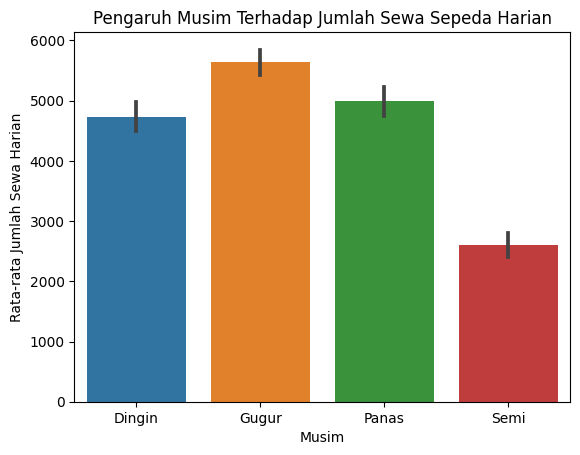

In [ ]:
sns.barplot(x='musim',y='jumlah', data = day_df)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.title('Pengaruh Musim Terhadap Jumlah Sewa Sepeda Harian')
plt.show()

Berdasarkan dari grafik bar diatas bahwa rata-rata musim gugur adalah musim dengan terbanyak penyewa sepeda diikuti oleh musim panas musim digin dan yang terendah musim semi

##**2. Apakah workingday, weekday, dan holiday berpengaruh dalam jumlah penyewa sepeda**

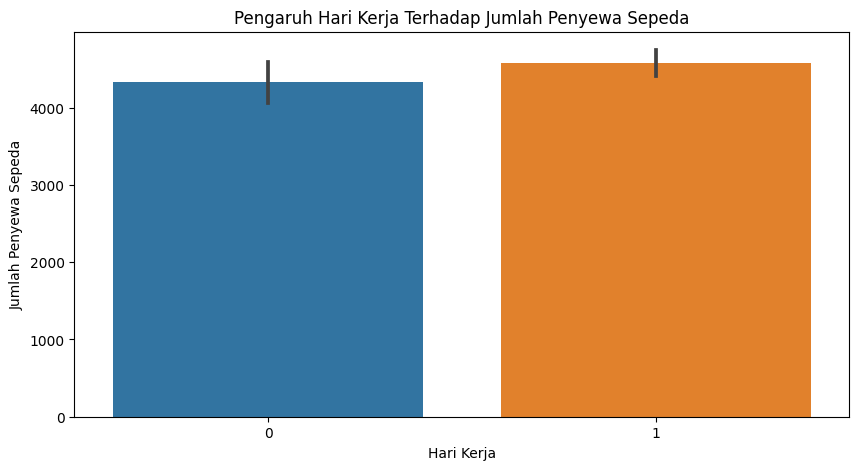

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='hari_kerja',y='jumlah', data = day_df)
plt.xlabel('Hari Kerja')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.title('Pengaruh Hari Kerja Terhadap Jumlah Penyewa Sepeda')
plt.show()

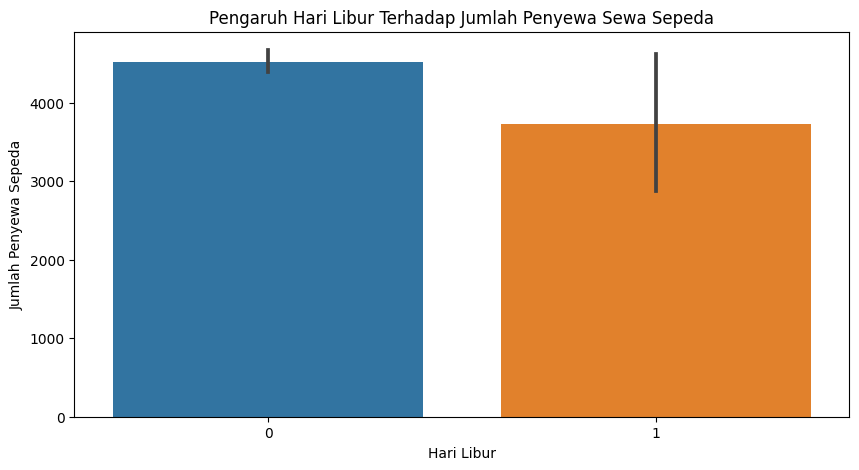

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='hari_libur',y='jumlah', data = day_df)
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.title('Pengaruh Hari Libur Terhadap Jumlah Penyewa Sewa Sepeda')
plt.show()

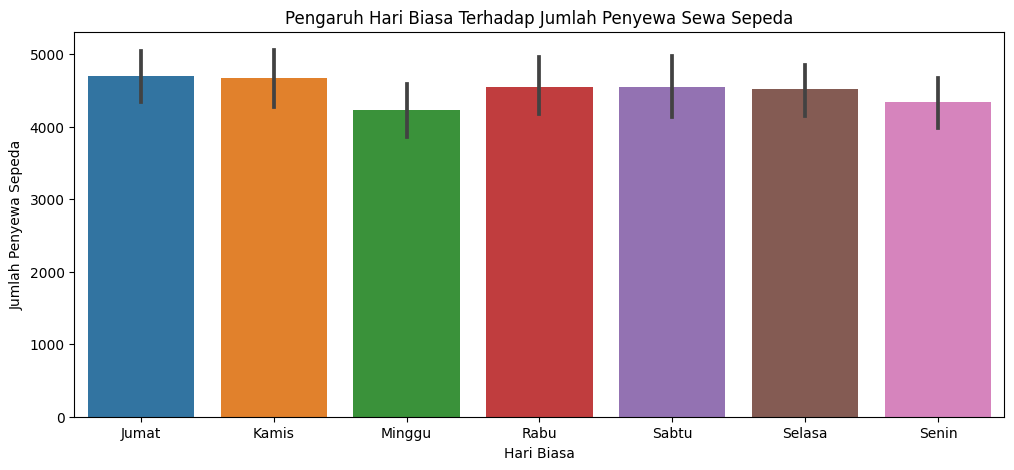

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(x='hari_biasa',y='jumlah', data = day_df)
plt.xlabel('Hari Biasa')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.title('Pengaruh Hari Biasa Terhadap Jumlah Penyewa Sewa Sepeda')
plt.show()

Berdasarkan 3 grafik diatas maka dapat disimpulkan bahwa

*   Pada hari kerja jumlah penyewa sepeda dibandingkan dengan non hari kerja
*   Pada hari libur jumlah penyewa sepeda hari libur dibandingkan dengan non hari libur
*   Pada hari biasa hari jumat lah hari yang paling banyak jumlah penyewa sepedanya dan hari minggu hari yang paling sedikit







##**3. Kapan jam-jam ramai orang melakukan penyewaan sepeda**

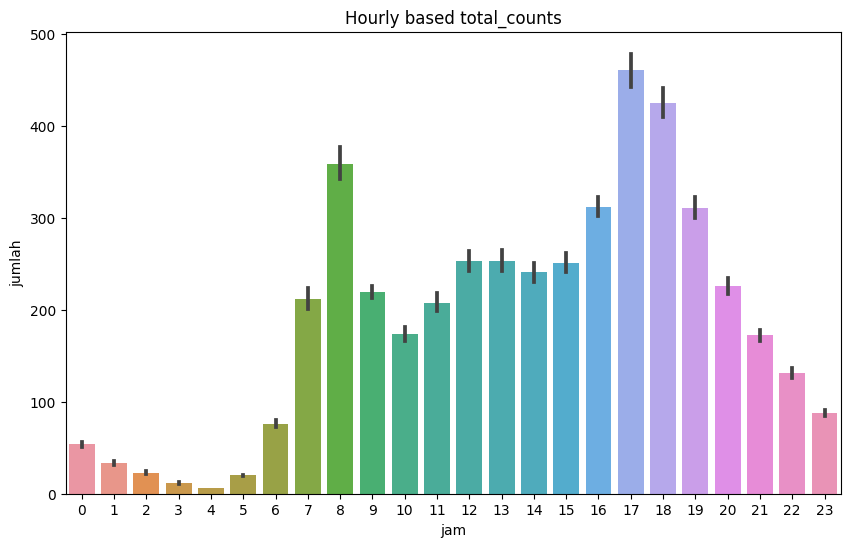

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='jam',y='jumlah', data=hour_df)
plt.title("Hourly based total_counts")
plt.show()

Dari grafik diatas, jam 5 dan 6 sore merupakan jam dengan penyewa sepeda terbanyak lalu pada jam 8 pagi juga cukup banyak sekitar 350an. Hal ini disebabkan karena pada pada jam tersebut merupakan jam sibuk orang berangkat maupun pulang kerja

##**4. Bagaimana tren penyewa sepeda di setiap bulannya di tahun 2011 dan 2012**

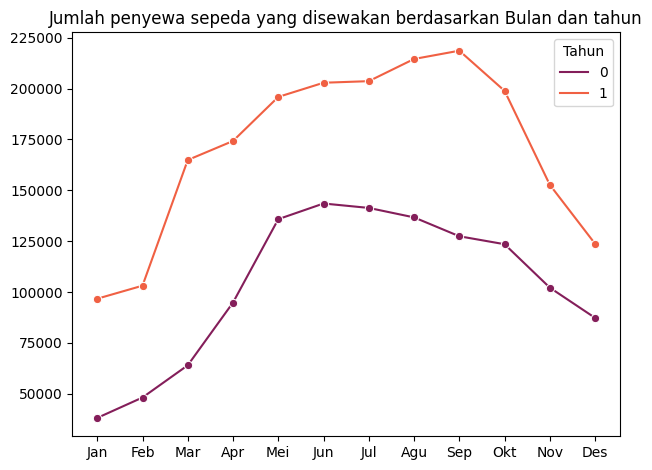

In [ ]:
day_df['bulan'] = pd.Categorical(day_df['bulan'], categories=
    ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des'],
    ordered=True)

monthly_counts = day_df.groupby(by=["bulan","tahun"]).agg({
    "jumlah": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="bulan",
    y="jumlah",
    hue="tahun",
    palette="rocket",
    marker="o")

plt.title("Jumlah penyewa sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Dari grafik diatas pada tahun 2012 jumlah penyewa sepeda lebih unggul daripada tahun 2011. Pada tahun 2012 bulan september merupakan bulan yang jumlah penyewa sepeda terbanyak dan pada bulan januari yang paling sedikit. Sedangkan pada bulan 2011 bulan juni merupakan jumlah yang terbanyak dan bulan januari juga lah yang paling sedikit

##**5. Bagaimana pengaruh cuaca dalam jumlah penyewa sepeda**

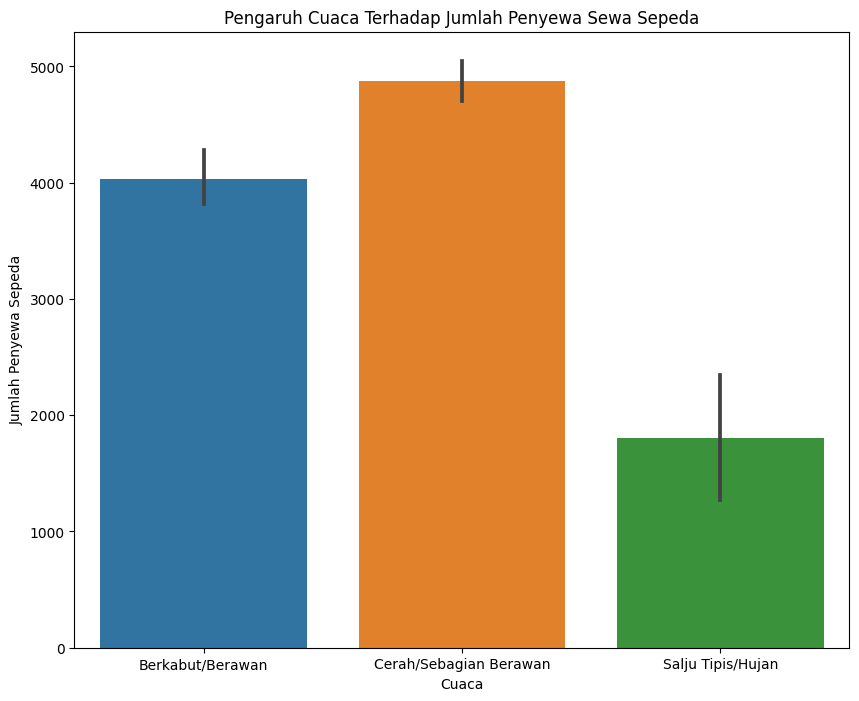

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='cuaca',y='jumlah', data = day_df)
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.title('Pengaruh Cuaca Terhadap Jumlah Penyewa Sewa Sepeda')
plt.show()

Dari grafik diatas penyewa sepeda cenderung menyewa pada cuaca yang cerah atau sebagian berawan lalu diikuti dengan berkabut/berawan dan yang paling sedikit adalah salju tipis/hujan sedangkan pada cuaca buruk tidak ada satupun yang menyewa sepeda

#**Conclusion**

##**1. Bagaimana Pengaruh Musim Terhadap Jumlah Penyewa Sepeda**

Pada analisa dan grafik yang kita lakukan sebelumnya jelas musim memiliki pengaruh terhadap jumlah penyewa sepeda. Musim gugur merupakan musim yang paling diminati para penyewa sepeda dengan rata-rata 5644 lalu diikuti oleh musim panas dengan rata-rata 4992, ketiga musim dingin dengan rata-rata 4728, dan yang terakhir musim semi dengan rata-rata 2604

##**2. Apakah workingday, weekday, dan holiday berpengaruh dalam jumlah penyewa sepeda**

Pada analisa dan grafik yang kita lakukan sebelumnya bahwa pada hari kerja(workingday) unggul daripada non hari kerja(workingday), sedangkan pada hari biasa hari jumat lah hari yang paling banyak jumlah penyewa sepeda dengan rata-rata 4690 dan hari minggu hari yang paling sedikit jumlah penyewa sepeda dengan rata-rata 4228. Pada hari libur terdapat perbedaan dengan non hari libur, non hari libur unggul daripada hari libur mungkin para penyewa sepeda berasal dari kalangan pekerja yang mana mereka menggunakan sepeda pada hari biasa atau hari kerja


##**3. Kapan jam-jam ramai orang melakukan penyewaan sepeda**
Pada analisa dan grafik yang kita lakukan sebelumnya menunjukkan bahwa pada jam 5 dan 6 sore dengan rata-rata 461 dan 425 merupakan jam-jam ramai orang melakukan penyewaan sepeda dan pada pagi hari jam 8 dengan rata-rata 359 merupakan jam-jam ramai orang melakukan penyewaan sepeda. Hal ini dikarenakan para customer melakukan penyewaan sepeda untuk mereka beraktivitas seperti berangkat dan pulang kerja

##**4. Bagaimana tren penyewa sepeda di setiap bulannya di tahun 2011 dan 2012**
Pada analisa dan grafik yang kita lakukan sebelumnya bahwa pada tahun 2012 mengungguli tahun 2011 di setiap bulannya. Yang membedakan antara tahun 2012 dan tahun 2011 ialah bulan yang jumlah penyewa sepedanya lebih banyak,
pada tahun 2012 bulan september merupakan bulan dengan penyewa sepeda terbanyak, sedangkan pada tahun 2011  bulan juni merupakan bulan dengan penyewa sepeda terbanyak. Pada tahun 2012 dan 2011 memiliki kesamaan dengan bulan januri jumlah penyewa sepeda terdikit

##**5. Bagaimana pengaruh cuaca dalam jumlah penyewa sepeda**
Pada analisa dan grafik yang kita lakukan sebelumnya bahwa penyewa sepeda gemar melakukan sewa pada cuaca yang cerah/sebagian berawan dengan rata-rata 4876 diikuti dengan cuaca berkabut/berawan dengan rata-rata 4035 dan terendah salju tipis/hujan dengan rata-rata 1803 sedangkan pada cuaca buruk tidak ada satupun orang melakukan sewa sepeda

In [ ]:
all_df.to_csv("all_data.csv", index=False)

NameError: ignored